In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas import DataFrame,Series
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from random import sample

In [27]:
dup_train = pd.read_csv('../FeaturesCsvFile/featuresfile.csv')
dup_test = pd.read_csv('../FeaturesCsvFile/featuresfile_10.csv')
df1 = dup_test.drop_duplicates(subset=['User', 'Timestamp'])
df2 = dup_train.drop_duplicates(subset=['User', 'Timestamp'])
frames = [df1, df2]
df= pd.concat(frames)
df.shape

(821, 46)

In [30]:
X = df.values[:, 2:45]
y = df.values[:, 45] #label : walking/runing
y_plot = np.where(y == 'walking', -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_plot, test_size=0.3)
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPClassifier(hidden_layer_sizes=(15,),max_iter=60)
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print('Accuracy of Accuracy Score : %.2f' % accuracy_score(y_test,y_pred))
print('Accuracy of Multi-Layer Perceptron Score: %.2f' % mlp.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy of Accuracy Score : 0.95
Accuracy of Multi-Layer Perceptron Score: 0.95
[[132   5]
 [  7 103]]
             precision    recall  f1-score   support

         -1       0.95      0.96      0.96       137
          1       0.95      0.94      0.94       110

avg / total       0.95      0.95      0.95       247



In [15]:
avg_weight = []
for i in range(0,len(mlp.coefs_[0])):
    avg_weight.append(np.mean(mlp.coefs_[0][i]))
print ('Important features (featureName, weigh of important, #column)')
header = list(df.head(1))
important_feature = []
for i in range(0,len(avg_weight)):
     important_feature.append((header[i+2],avg_weight[i],i+2))
sorted_list = sorted(important_feature,key=lambda important_feature: important_feature[1],reverse=True)
for j in range(0,len(sorted_list)):
        first_imp_fea = sorted_list[0]
        second_imp_fea = sorted_list[1]
        print sorted_list[j]

Important features (featureName, weigh of important, #column)
('Bin3,z', 0.10825592994061183, 24)
('Bin6,x', 0.099050904501434653, 7)
('AvgAcc-y', 0.072431320057493101, 39)
('Bin5,x', 0.070197353658616207, 6)
('StdDev-y', 0.059787564913883734, 42)
('Bin7,z', 0.059601690509690934, 28)
('Bin9,y', 0.044901323984415702, 20)
('AvgAbsDiff-z', 0.030665486239005578, 37)
('Bin3,y', 0.028917213562429201, 14)
('AvgAcc-x', 0.027602009597943528, 38)
('TimeDiffPeaks-y', 0.024406273141934252, 33)
('Bin1,z', 0.022291450883107876, 22)
('Bin8,y', 0.013387262576128274, 19)
('Bin6,y', 0.012826037878942664, 17)
('Bin8,x', 0.0092786045093103797, 9)
('Bin2,z', 0.0088359802466105204, 23)
('Bin7,x', 0.0084503892418165989, 8)
('Bin3,x', 0.0061114596853632094, 4)
('Bin5,y', 0.0055106417495060771, 16)
('Bin6,z', 0.0029566149246515582, 27)
('Bin10,y', 0.0019471520057938692, 21)
('Bin9,z', 0.0013783328195343596, 30)
('AvgAbsDiff-y', -0.0013050781765424346, 36)
('Bin2,y', -0.0017919156902444012, 13)
('Bin2,x', -0.00

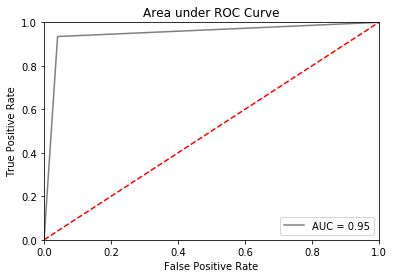

In [5]:
from sklearn import metrics
def plot_roc_curve(Y_predict,Y_test,name_graph):
    num_predns = []
    for i in range(0,len(Y_predict)):
        if Y_predict[i] == "walking":
            num_predns.append(0)
        else:
            num_predns.append(1)
    num_labels = []
    for i in range(0,len(Y_test)):
        if Y_test[i] == "walking":
            num_labels.append(0)
        else:
            num_labels.append(1)

    predns = np.array(num_predns)
    labels = np.array(num_labels)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Area under ROC Curve')
    plt.plot(fpr, tpr, 'grey', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
#     plt.savefig('./image/Area_under_roc_pc.png', dpi=1000)
    
plot_roc_curve(y_pred,y_test,"Area_under_roc_pc")

Confusion matrix, without normalization
[[132   5]
 [  7 103]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.06  0.94]]


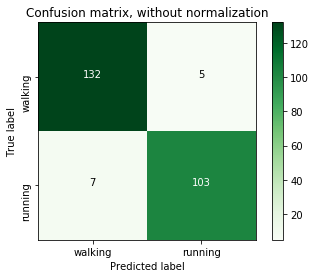

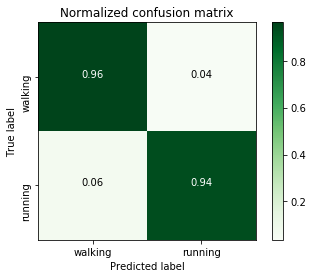

In [31]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes, rotation=90)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ["walking", "running"]
plot_confusion_matrix(cnf_matrix, classes=["walking", "running"],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()